In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt

### Changing the image from png to numpy array

In [2]:
# X_max and y_max can be made smaller to visualize more enlarged correlations

img = corr.png_to_numpy('data/time_048.png', 128)

## Visualizing the microstructure(cropped)

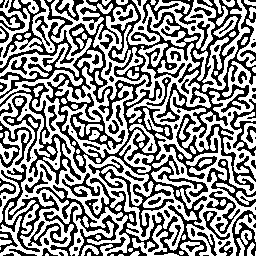

In [3]:
Image.fromarray(img)

## Binarize array

In [4]:
img_binary = corr.binarize_image(img)
img_binary.shape

(256, 256)

# Correlation plots obtained by using PYMKS library

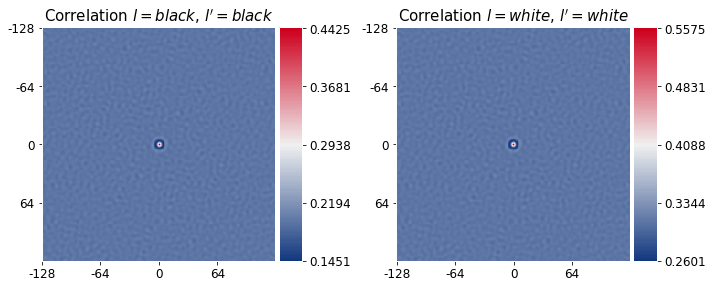

array([[[[0.1890564 , 0.30404663],
         [0.18966675, 0.30465698],
         [0.19084167, 0.30583191],
         ...,
         [0.19171143, 0.30670166],
         [0.19084167, 0.30583191],
         [0.18966675, 0.30465698]],

        [[0.19116211, 0.30615234],
         [0.19198608, 0.30697632],
         [0.19276428, 0.30775452],
         ...,
         [0.19361877, 0.30860901],
         [0.19270325, 0.30769348],
         [0.19163513, 0.30662537]],

        [[0.19648743, 0.31147766],
         [0.19656372, 0.31155396],
         [0.19694519, 0.31193542],
         ...,
         [0.19714355, 0.31213379],
         [0.19677734, 0.31176758],
         [0.19642639, 0.31141663]],

        ...,

        [[0.1999054 , 0.31489563],
         [0.20024109, 0.31523132],
         [0.20095825, 0.31594849],
         ...,
         [0.19952393, 0.31451416],
         [0.20022583, 0.31521606],
         [0.19985962, 0.31484985]],

        [[0.19648743, 0.31147766],
         [0.19642639, 0.31141663],
         [0.

In [5]:
# Auto Correlation

corr.auto_corr_from_pymks(img_binary)


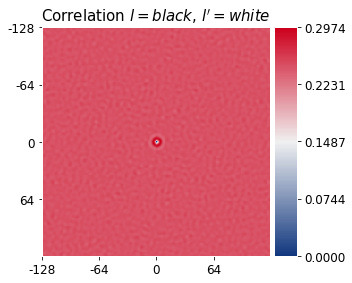

In [6]:
# Cross Correlation

cross_pymks =corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white region : 


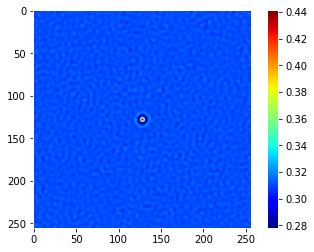

black region : 


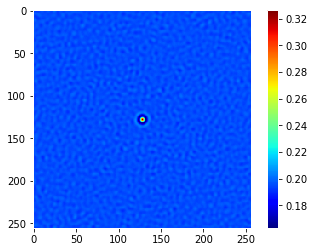

In [7]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)

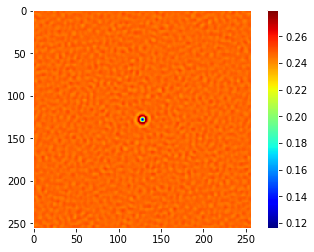

In [8]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)

In [9]:
cross_flat = (cross[128])
cross_pymks_flat = (cross_pymks[0][128].flatten())


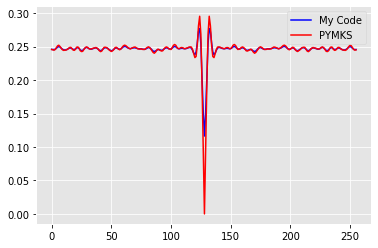

In [10]:
plt.plot(cross_flat,'b',cross_pymks_flat,'r')
plt.legend(['My Code','PYMKS'])


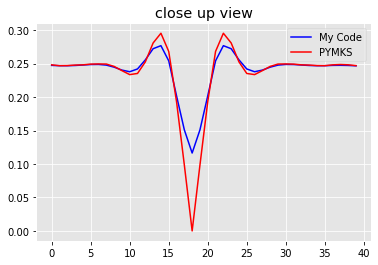

In [11]:
cross_flat = (cross[128])[110:150]
cross_pymks_flat = (cross_pymks[0][128].flatten())[110:150]
plt.plot(cross_flat,'b',cross_pymks_flat,'r')
plt.title("close up view")
plt.legend(['My Code','PYMKS'])
